In [211]:
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
import easyocr
import subprocess


image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1001(2023-06-07T08_06_44).jpg: 640x480 1 refrigerator, 434.5ms
Speed: 3.0ms preprocess, 434.5ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 480)


noutoMat
1001


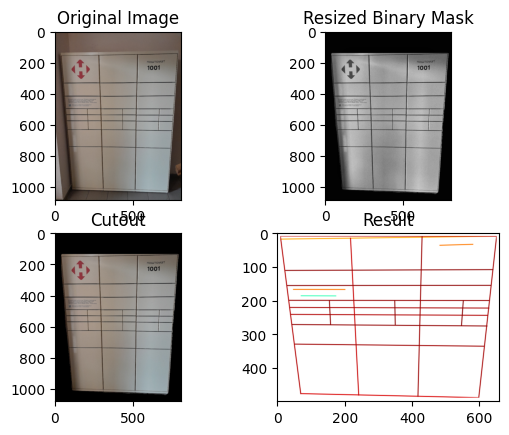


image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1002(2023-06-29T11_47_18).jpg: 384x640 1 refrigerator, 272.8ms
Speed: 2.6ms preprocess, 272.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


71 57


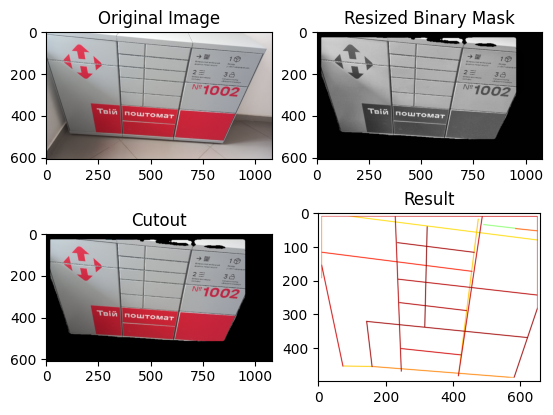


image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1010(2023-05-29T12_17_09).jpg: 640x320 (no detections), 343.6ms
Speed: 2.2ms preprocess, 343.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 320)

image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1012(2023-07-04T08_32_24).jpg: 384x640 1 refrigerator, 314.4ms
Speed: 2.0ms preprocess, 314.4ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


64
1
B:taxgai X Vjeiehxa
JULJ
halc io-pann-
Aoajtck Hoedi mowta
2 =
30
346eph 


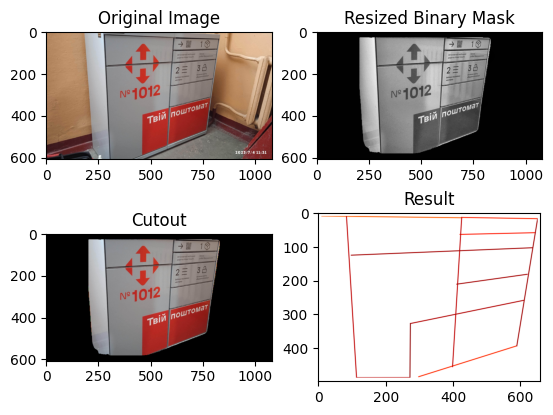


image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1013(2023-07-04T08_27_05).jpg: 384x640 1 refrigerator, 299.1ms
Speed: 3.0ms preprocess, 299.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


0O
200


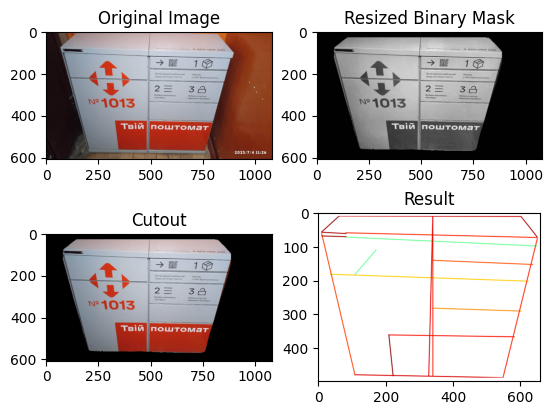


image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1014(2023-06-09T07_57_47).jpg: 640x480 (no detections), 347.9ms
Speed: 2.0ms preprocess, 347.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1015(2023-06-09T07_51_33).jpg: 640x480 (no detections), 346.0ms
Speed: 3.0ms preprocess, 346.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1016(2023-06-09T07_41_41).jpg: 640x480 (no detections), 374.0ms
Speed: 3.0ms preprocess, 374.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\Tymof\OneDrive\Desktop\education\Practice\Meduzzen_Intership\ML_NovaPoshta_CV\data\images_data\1017(2023-07-11T12_12_54).jpg: 640x480 1 oven, 376.3ms

[21 8


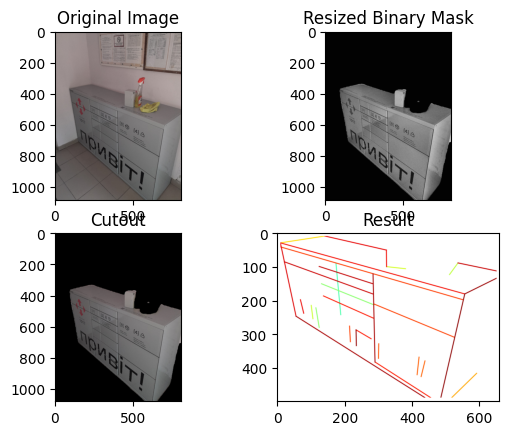

In [214]:
ys = YOLO("./models/yolov8s-seg.pt")

fold_location = os.listdir("./data/images_data/")
i=0
for location in fold_location:
    i += 1
    if i==10:
        break
    img_location = "./data/images_data/" + location
    image = cv2.imread(img_location)
    results = ys.predict(source=img_location,max_det=1, conf=0.03,classes=[5,11,37,69,72]) #,classes=[5,11,37,69,72]
    
    for res in results:

        mask_found = False

        if res.masks is  None:
            continue

        for j in range(len(res.masks)):
            mask = (res.masks[j].data.numpy() * 255).astype("uint8")

            resized_mask = cv2.resize(mask[0], (image.shape[1], image.shape[0]))

            inverse_mask_colored = cv2.cvtColor(resized_mask, cv2.COLOR_GRAY2BGR)

            result_image = cv2.bitwise_and(image, inverse_mask_colored)

            gray_img = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)

            equalized_img = cv2.equalizeHist(gray_img) 

            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            clahe_img = clahe.apply(gray_img)

            # CHECK OUT IF MASK HAS SOME TEXT OTHERWISE CHOOSE NEXT MASK
            text_found = False
            number_found = False
            reader = easyocr.Reader(['en'],gpu=False)
            result_ocr = reader.readtext(result_image)

            for r_ocr in result_ocr:
                if r_ocr[2]<0.7 or r_ocr[1].isnumeric() is False:
                    pass
                top_left=tuple(r_ocr[0][0])
                bottom_right = tuple(r_ocr[0][2])
                top_left = (int(top_left[0]), int(top_left[1]))
                bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
                text = r_ocr[1]
                text_found = True
                numbers = 0
                for c in text:
                    if c.isnumeric():
                        numbers+=1
                if numbers>=3:
                    number_found = True
                print(r_ocr[1])

                if number_found==True:
                    break
            
            if number_found == False:
                continue


            plt.subplot(2, 2, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")

            plt.subplot(2, 2, 2)
            plt.imshow(clahe_img, cmap='gray')
            plt.title("Resized Binary Mask")

            plt.subplot(2, 2, 3)
            plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
            plt.title("Cutout")
            plt.imsave(f"res{i}.png",clahe_img)

            script_to_run = './models/lcnn/demo.py'

            script_parameters = ['-d 0', './models/lcnn/config/wireframe.yaml','C:/Users/Tymof/OneDrive/Desktop/education/Practice/Meduzzen_Intership/ML_NovaPoshta_CV/models/lcnn/190418-201834-f8934c6-lr4d10-312k.pth', f'C:/Users/Tymof/OneDrive/Desktop/education/Practice/Meduzzen_Intership/ML_NovaPoshta_CV/res{i}.png']

            result  = subprocess.run(['python', script_to_run] + script_parameters,stdout=subprocess.PIPE, text=True)
            new_image = cv2.imread(f'./res{i}-0.94.png')
            plt.subplot(2, 2, 4)
            plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
            plt.title("Result")
            plt.show()

            mask_found = True

            break
        if mask_found == True: 
            break


In [200]:


script_to_run = './models/lcnn/demo.py'

script_parameters = ['-d 0', './models/lcnn/config/wireframe.yaml','C:/Users/Tymof/OneDrive/Desktop/education/Practice/Meduzzen_Intership/ML_NovaPoshta_CV/models/lcnn/190418-201834-f8934c6-lr4d10-312k.pth', f'C:/Users/Tymof/OneDrive/Desktop/education/Practice/Meduzzen_Intership/ML_NovaPoshta_CV/data/types_postoffice_boxes/new_33.png']

result  = subprocess.run(['python', script_to_run] + script_parameters,stdout=subprocess.PIPE, text=True)

print(result.stdout)


<Box: {'io': {'logdir': 'logs/', 'datadir': 'data/wireframe/', 'resume_from': None, 'num_workers': 4, 'tensorboard_port': 0, 'validation_interval': 24000}, 'model': {'image': {'mean': [109.73, 103.832, 98.681], 'stddev': [22.275, 22.124, 23.229]}, 'batch_size': 6, 'batch_size_eval': 2, 'head_size': [[2], [1], [2]], 'loss_weight': {'jmap': 8.0, 'lmap': 0.5, 'joff': 0.25, 'lpos': 1, 'lneg': 1}, 'backbone': 'stacked_hourglass', 'depth': 4, 'num_stacks': 2, 'num_blocks': 1, 'n_stc_posl': 300, 'n_stc_negl': 40, 'n_dyn_junc': 300, 'n_dyn_posl': 300, 'n_dyn_negl': 80, 'n_dyn_othr': 600, 'n_pts0': 32, 'n_pts1': 8, 'dim_loi': 128, 'dim_fc': 1024, 'n_out_junc': 250, 'n_out_line': 2500, 'use_cood': 0, 'use_slop': 0, 'use_conv': 0, 'eval_junc_thres': 0.008}, 'optim': {'name': 'Adam', 'lr': 0.0004, 'amsgrad': True, 'weight_decay': 0.0001, 'max_epoch': 24, 'lr_decay_epoch': 10}}>
CUDA is not available
Processing C:/Users/Tymof/OneDrive/Desktop/education/Practice/Meduzzen_Intership/ML_NovaPoshta_CV/d

Similarity detection

In [204]:

def calculate_sift_similarity(image_path1, image_path2):
    image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    sift = cv2.SIFT_create()

    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    matcher = cv2.BFMatcher()

    matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.99 * n.distance:
            good_matches.append(m)

    similarity = len(good_matches) / max(len(keypoints1), len(keypoints2))

    return len(good_matches)

img1 = ("./res-0.94.png")   
img2 =  ("./res4-0.94.png")
img3 = "./res5-0.94.png"
img_33t = ("./data/types_postoffice_boxes/new_33-0.94.png")
img_2t = ("./data/types_postoffice_boxes/new_2-0.94.png")

sift_similarity = calculate_sift_similarity(img1, img_33t)

print(f'SIFT Similarity: {sift_similarity}')

fold_location = os.listdir("./data/schemas_postoffice_boxes/")
max_similarity = 0
name = ""
for location in fold_location:
    img_location = "./data/schemas_postoffice_boxes/" + location
    sift_similarity = calculate_sift_similarity(img1, img_location)
    if sift_similarity>max_similarity:
        max_similarity = sift_similarity
        name = location

print(name)
print(max_similarity)




SIFT Similarity: 301
new_3-0.94.png
312


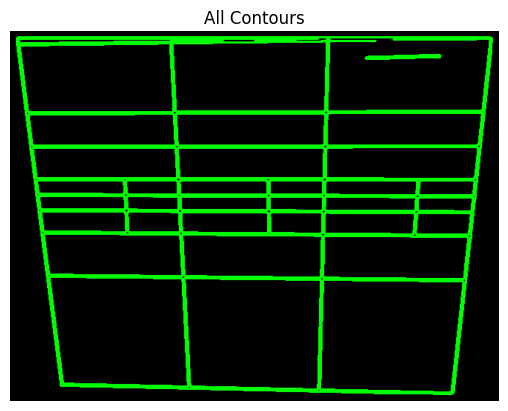

In [223]:
img1 = ("./res-0.94.png")   

def identify_quadrilaterals(image_path):
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a black canvas to draw all contours
    all_contours_image = np.zeros_like(image)

    # Draw all contours on the black canvas
    cv2.drawContours(all_contours_image, contours, -1, (0, 255, 0), 2)  # Draw green contours

    # Display the black canvas with all contours
    plt.imshow(cv2.cvtColor(all_contours_image, cv2.COLOR_BGR2RGB))
    plt.title('All Contours')
    plt.axis('off')
    plt.show()

# Example usage
identify_quadrilaterals(img1)

In [226]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def identify_quadrilaterals(image_path, output_folder):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through contours and save each as a separate image
    for i, contour in enumerate(contours):
        # Create a black canvas
        contour_image = np.zeros_like(image)

        # Draw the current contour on the canvas
        cv2.drawContours(contour_image, [contour], 0, (0, 255, 0), 2)  # Draw green contour

        # Save the image with a unique filename
        output_path = os.path.join(output_folder, f'contour_{i+1}.png')
        cv2.imwrite(output_path, contour_image)

    print(f'{len(contours)} contours saved in {output_folder}')

# Example usage
identify_quadrilaterals('./res4-0.94.png', 'contour_images')


5 contours saved in contour_images
